In [16]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy.random import normal
from scipy.stats import norm
from scipy.optimize import bisect
import matplotlib.pyplot as plt

In [17]:
def bivariate_normal(rho, n):
    """
    sample points from a bivariate normal distribution
    inputs: rhos=correlation, n=number of points
    """
    
    z1 = [normal() for i in range(n)]
    z2 = [normal() for i in range(n)]
    
    e1 = z1
    rho2 = np.sqrt(1 - pow(rho, 2))
    e2 = [rho * e1 + rho2 * e2 for e1, e2 in zip(z1, z2)]
    
    return e1, e2 

In [18]:
class univariate():
    """univariate distribution, cumulative and inverse"""
    
    def __init__(self, fcn):
        
        self.a, self.b, self.steps = -3,3,1000
        self.fcn = fcn
        self.x = np.linspace(self.a, self.b, self.steps)
        self.integral = pd.DataFrame([self.x, self.fcn(self.x)], index=['input','output']).transpose()
        self.integral['integral'] = np.cumsum(np.array(self.integral['output']))*(self.x[1]-self.x[0])

    def get_value(self, x):
        
        return self.fcn(x)
    
    def get_inverse(self, y):
        
        i = np.searchsorted(self.integral['integral'][:-1], y) ### exclude top most point  ##
        return float(self.integral['input'].iloc[i])

def plot_dist(g, function_name):
    
    x = np.linspace(-1, 2, 1000)
    out = pd.DataFrame([x, g(x)], index=['input','output']).transpose()
    fig, ax = plt.subplots(figsize=(18,5))
    
    plt.subplot(1,2,1)
    plt.plot(out['input'], out['output'], lw=5)
    plt.title(f'function {function_name} density')
    plt.subplot(1,2,2)
    plt.plot(x, np.cumsum(np.array(out['output']))*(x[1]-x[0]), lw=5)
    plt.title(f'function {function_name} distribution')
    
    plt.show()
    
def plot_2_dists(gs, function_names):
    
    plt.figure(figsize=(18,7))
    
    for i, (g, function_name) in enumerate(zip(gs, function_names)):
        
        x = np.linspace(-1, 2, 1000)
        out = pd.DataFrame([x, g(x)], index=['input','output']).transpose()
        plt.subplot(1,2,i+1)
        plt.plot(out['input'], out['output'], lw=5)
        plt.title(f'function {function_name} density', fontsize=15)
        
    plt.show()

In [19]:
def f(x):
    
    df = 15
    
    return 10 * stats.t.pdf(x * 10, df)

In [20]:
def g(x):
    
    return np.piecewise(x, [x < 0, x >= 0, x >= 0.5, x > 1.0], [0, lambda x: 4 * x, lambda x: 2 - 4 * (x - 0.5), 0])

C:\Users\steve\AppData\Local\Temp\ipykernel_14056\520587506.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


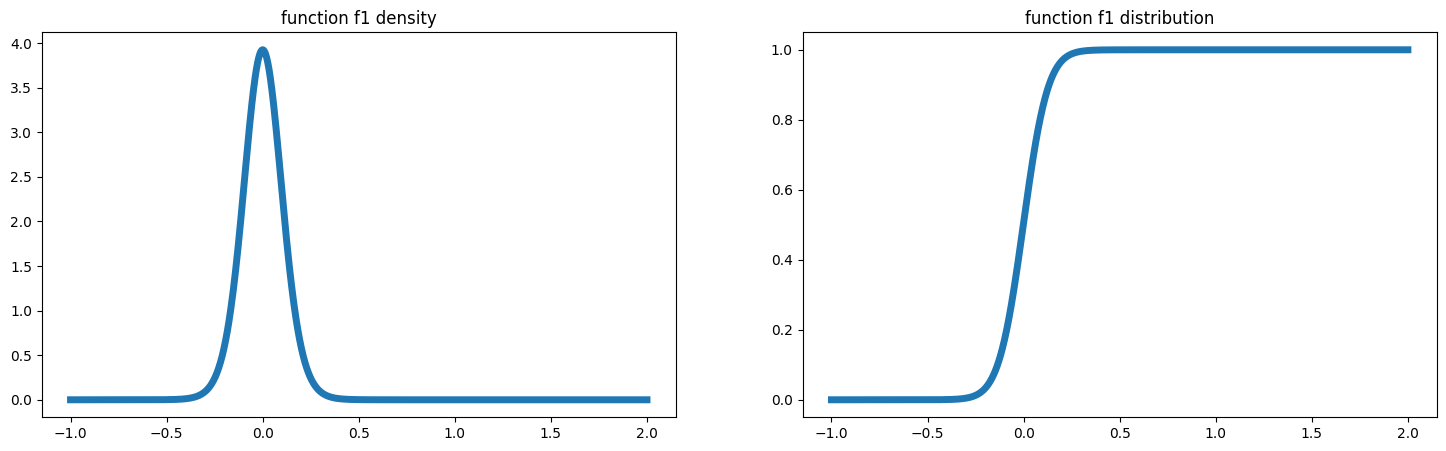

C:\Users\steve\AppData\Local\Temp\ipykernel_14056\520587506.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


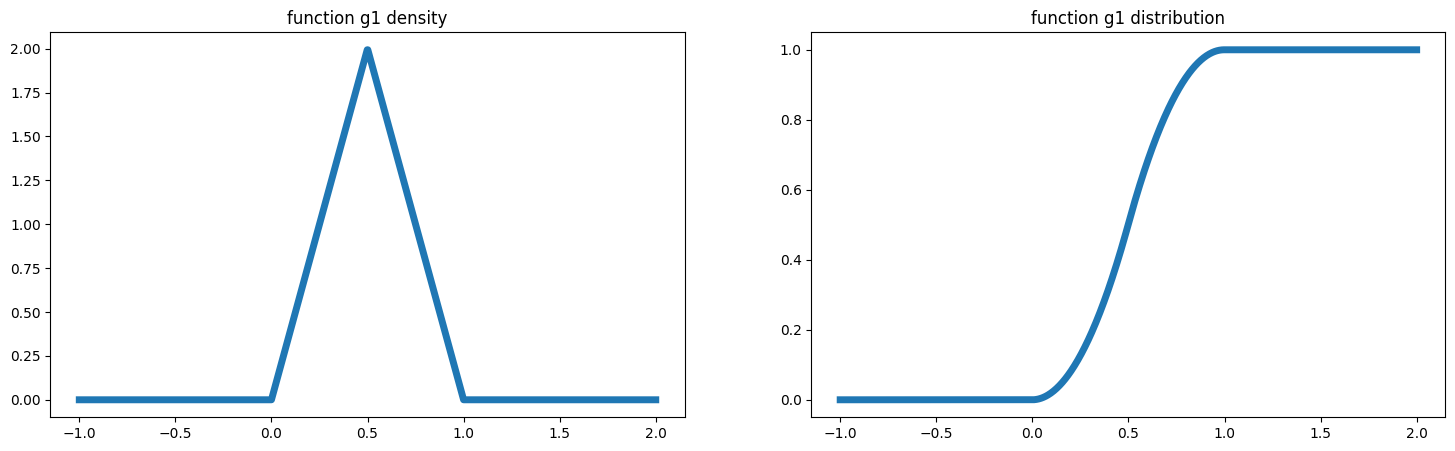

In [21]:
plot_dist(f, 'f1')
plot_dist(g, 'g1')

In [22]:
fcn_f = univariate(f)
fcn_g = univariate(g)

In [23]:
correlations = np.arange(-0.90, 0.90, 0.05)

In [24]:
for corr in correlations: 

    e1, e2 = bivariate_normal(corr, 2000)
    x1 = [fcn_f.get_inverse(norm.cdf(e)) for e in e1]
    x2 = [fcn_g.get_inverse(norm.cdf(e)) for e in e2]
    
    print(np.std(x1))
    print(np.std(x2))
    print("\n")

#     plt.figure(figsize=(18,4))
#     plt.subplot(1,2,1)
#     plt.hist(x1,30)
#     plt.title('x1 sample distribution')
#     plt.subplot(1,2,2)
#     plt.hist(x2,30)
#     plt.title('x2 sample distribution')
#     plt.show()

#     plt.figure(figsize=(7,7))
#     # plt.plot(x1,x2, 'o')
#     plt.scatter(x1, x2, s=80, facecolors='none', edgecolors='blue')
#     plt.title(f'copula with correlation {corr}')
#     plt.xlabel('x1')
#     plt.ylabel('x2')
#     plt.show()
    
#     break

0.10746925011742609
0.20495056042544793


0.10512430541057823
0.19986123431383565


0.10657407104077328
0.2002430454027983


0.10719701232638881
0.20256886603777535


0.10734528666470497
0.20349535543596156


0.11053932970612926
0.20567364946077793


0.10693144904214903
0.20639111865927998


0.1079652000060217
0.20402801231249243


0.10789081093745845
0.2039819438509227


0.11009594353767134
0.20229713402997843


0.10582141769373997
0.20387206480977424


0.10649111690465653
0.20281325867301983


0.10767585318737856
0.20448757939072984


0.10893444616101584
0.19767536746457207


0.10649856065176833
0.20081571022207031


0.10489585825005175
0.20133732618944583


0.10512467595570552
0.20458259040680568


0.10658755419142665
0.20257773427281633


0.10702098879000857
0.20582406255077437


0.10713815791854682
0.20525132848920935


0.10700963044022206
0.20442372935691014


0.10694316876664145
0.2039606735224492


0.10813319691362708
0.20249460956959467


0.1077746766242516
0.20360879421484268